In [ ]:
from __future__ import print_function
import tensorflow as tf

import random
import numpy as np
import pandas as pd

import scipy.io
from scipy.signal import spectrogram
import matplotlib.pyplot as plt
import cv2

In [ ]:
""
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir Patient_1.zip
!mv Patient_1.zip Patient_1

In [ ]:
%cd Patient_1

/content/Patient_1


In [ ]:
!unzip /content/drive/MyDrive/data/Patient_1.zip

Archive:  /content/drive/MyDrive/data/Patient_1.zip
  inflating: Patient_1/Patient_1_interictal_segment_0001.mat  
  inflating: Patient_1/Patient_1_interictal_segment_0002.mat  
  inflating: Patient_1/Patient_1_interictal_segment_0003.mat  
  inflating: Patient_1/Patient_1_interictal_segment_0004.mat  
  inflating: Patient_1/Patient_1_interictal_segment_0005.mat  
  inflating: Patient_1/Patient_1_interictal_segment_0006.mat  
  inflating: Patient_1/Patient_1_interictal_segment_0007.mat  
  inflating: Patient_1/Patient_1_interictal_segment_0008.mat  
  inflating: Patient_1/Patient_1_interictal_segment_0009.mat  
  inflating: Patient_1/Patient_1_interictal_segment_0010.mat  
  inflating: Patient_1/Patient_1_interictal_segment_0011.mat  
  inflating: Patient_1/Patient_1_interictal_segment_0012.mat  
  inflating: Patient_1/Patient_1_interictal_segment_0013.mat  
  inflating: Patient_1/Patient_1_interictal_segment_0014.mat  
  inflating: Patient_1/Patient_1_interictal_segment_0015.mat  
  i

In [ ]:
import os
fl = os.path.join('/content/Patient_1/Patient_1','Patient_1_test_segment_0001.mat')
data = scipy.io.loadmat(fl)
print(data)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Thu Aug 21 01:00:00 2014', '__version__': '1.0', '__globals__': [], 'test_segment_1': array([[(array([[ 300,  300,  301, ..., -322, -324, -325],
       [  33,   33,   34, ..., -318, -319, -322],
       [ -91,  -91,  -90, ...,   29,   28,   27],
       ...,
       [-255, -254, -255, ..., -150, -150, -151],
       [-438, -438, -439, ...,  -40,  -38,  -37],
       [ 445,  445,  444, ..., -460, -460, -460]], dtype=int16), array([[600]], dtype=uint16), array([[5000]], dtype=uint16), array([[array(['LD_1'], dtype='<U4'), array(['LD_3'], dtype='<U4'),
        array(['LD_4'], dtype='<U4'), array(['LD_5'], dtype='<U4'),
        array(['LD_6'], dtype='<U4'), array(['LD_7'], dtype='<U4'),
        array(['LD_8'], dtype='<U4'), array(['RD_1'], dtype='<U4'),
        array(['RD_2'], dtype='<U4'), array(['RD_3'], dtype='<U4'),
        array(['RD_4'], dtype='<U4'), array(['RD_5'], dtype='<U4'),
        array(['RD_6'], dtype='<U4'), arr

In [ ]:
from scipy.io import loadmat
annots = loadmat('/content/Patient_1/Patient_1/Patient_1_interictal_segment_0001.mat')

In [ ]:
#channel 0
annots['interictal_segment_1'][0][0][0][0].shape

(3000000,)

In [ ]:
#channel 1
annots['interictal_segment_1'][0][0][0][1].shape

(3000000,)

In [ ]:
#Visualizing an example:
interictal_tst = '/content/Patient_1/Patient_1/Patient_1_interictal_segment_0001.mat'
preictal_tst = '/content/Patient_1/Patient_1/Patient_1_preictal_segment_0001.mat'
interictal_data = scipy.io.loadmat(interictal_tst)
preictal_data = scipy.io.loadmat(preictal_tst)

In [ ]:
interictal_array = interictal_data['interictal_segment_1'][0][0][0]
preictal_array = preictal_data['preictal_segment_1'][0][0][0]

Interictal
[ 589  590  591 ... -489 -490 -493]


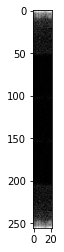

Preictal


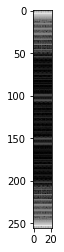

Interictal
[ 589  590  591 ... -489 -490 -493]


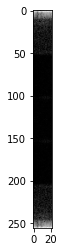

Preictal


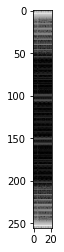

In [ ]:
l = list(range(10000))
for i in l[::5000]:
    print('Interictal')
    i_secs = interictal_array[14][i:i+5000]
    print(interictal_array[14])
    i_f, i_t, i_Sxx = spectrogram(i_secs, return_onesided=False)
    i_SS = np.log1p(i_Sxx)
    plt.imshow(i_SS[:] / np.max(i_SS), cmap='gray')
    plt.show()
    print('Preictal')
    p_secs = preictal_array[1][i:i+5000]
    p_f, p_t, p_Sxx = spectrogram(p_secs, fs=5000, return_onesided=False)
    p_SS = np.log1p(p_Sxx)
    plt.imshow(p_SS[:] / np.max(p_SS), cmap='gray')
    plt.show()
    

In [ ]:
all_X = []
all_Y = []

types = ['Patient_1_interictal_segment', 'Patient_1_preictal_segment']

for i,typ in enumerate(types):
    for j in range(18):
        fl = '/content/Patient_1/Patient_1/{}_{}.mat'.format(typ, str(j + 1).zfill(4))
        data = scipy.io.loadmat(fl)
        k = typ.replace('Patient_1_', '') + '_'
        d_array = data[k + str(j + 1)][0][0][0]
        lst = list(range(3000000))  # 10 minutes   5000*600
        for m in lst[::5000]:
            arr=[]
            p_secs = d_array[0][m:m+5000]
            p_f, p_t, p_Sxx = spectrogram(p_secs, fs=5000, return_onesided=False)
            p_SS = np.log1p(p_Sxx)
            arr1 = p_SS[:] / np.max(p_SS)
            arr.append(arr1)
            p_secs = d_array[1][m:m+5000]
            p_f, p_t, p_Sxx = spectrogram(p_secs, fs=5000, return_onesided=False)
            p_SS = np.log1p(p_Sxx)          #P_SS spectogram
            arr2 = p_SS[:] / np.max(p_SS)   #normalize
            arr.append(arr2)
            p_secs = d_array[2][m:m+5000]
            p_f, p_t, p_Sxx = spectrogram(p_secs, fs=5000, return_onesided=False)
            p_SS = np.log1p(p_Sxx)
            arr3 = p_SS[:] / np.max(p_SS)
            arr.append(arr3)
            arr=np.reshape(arr,(256,22,3))
            resized = cv2.resize(src=arr, dsize=(128,128), interpolation = cv2.INTER_AREA)
            all_X.append(resized)
            all_Y.append(i)

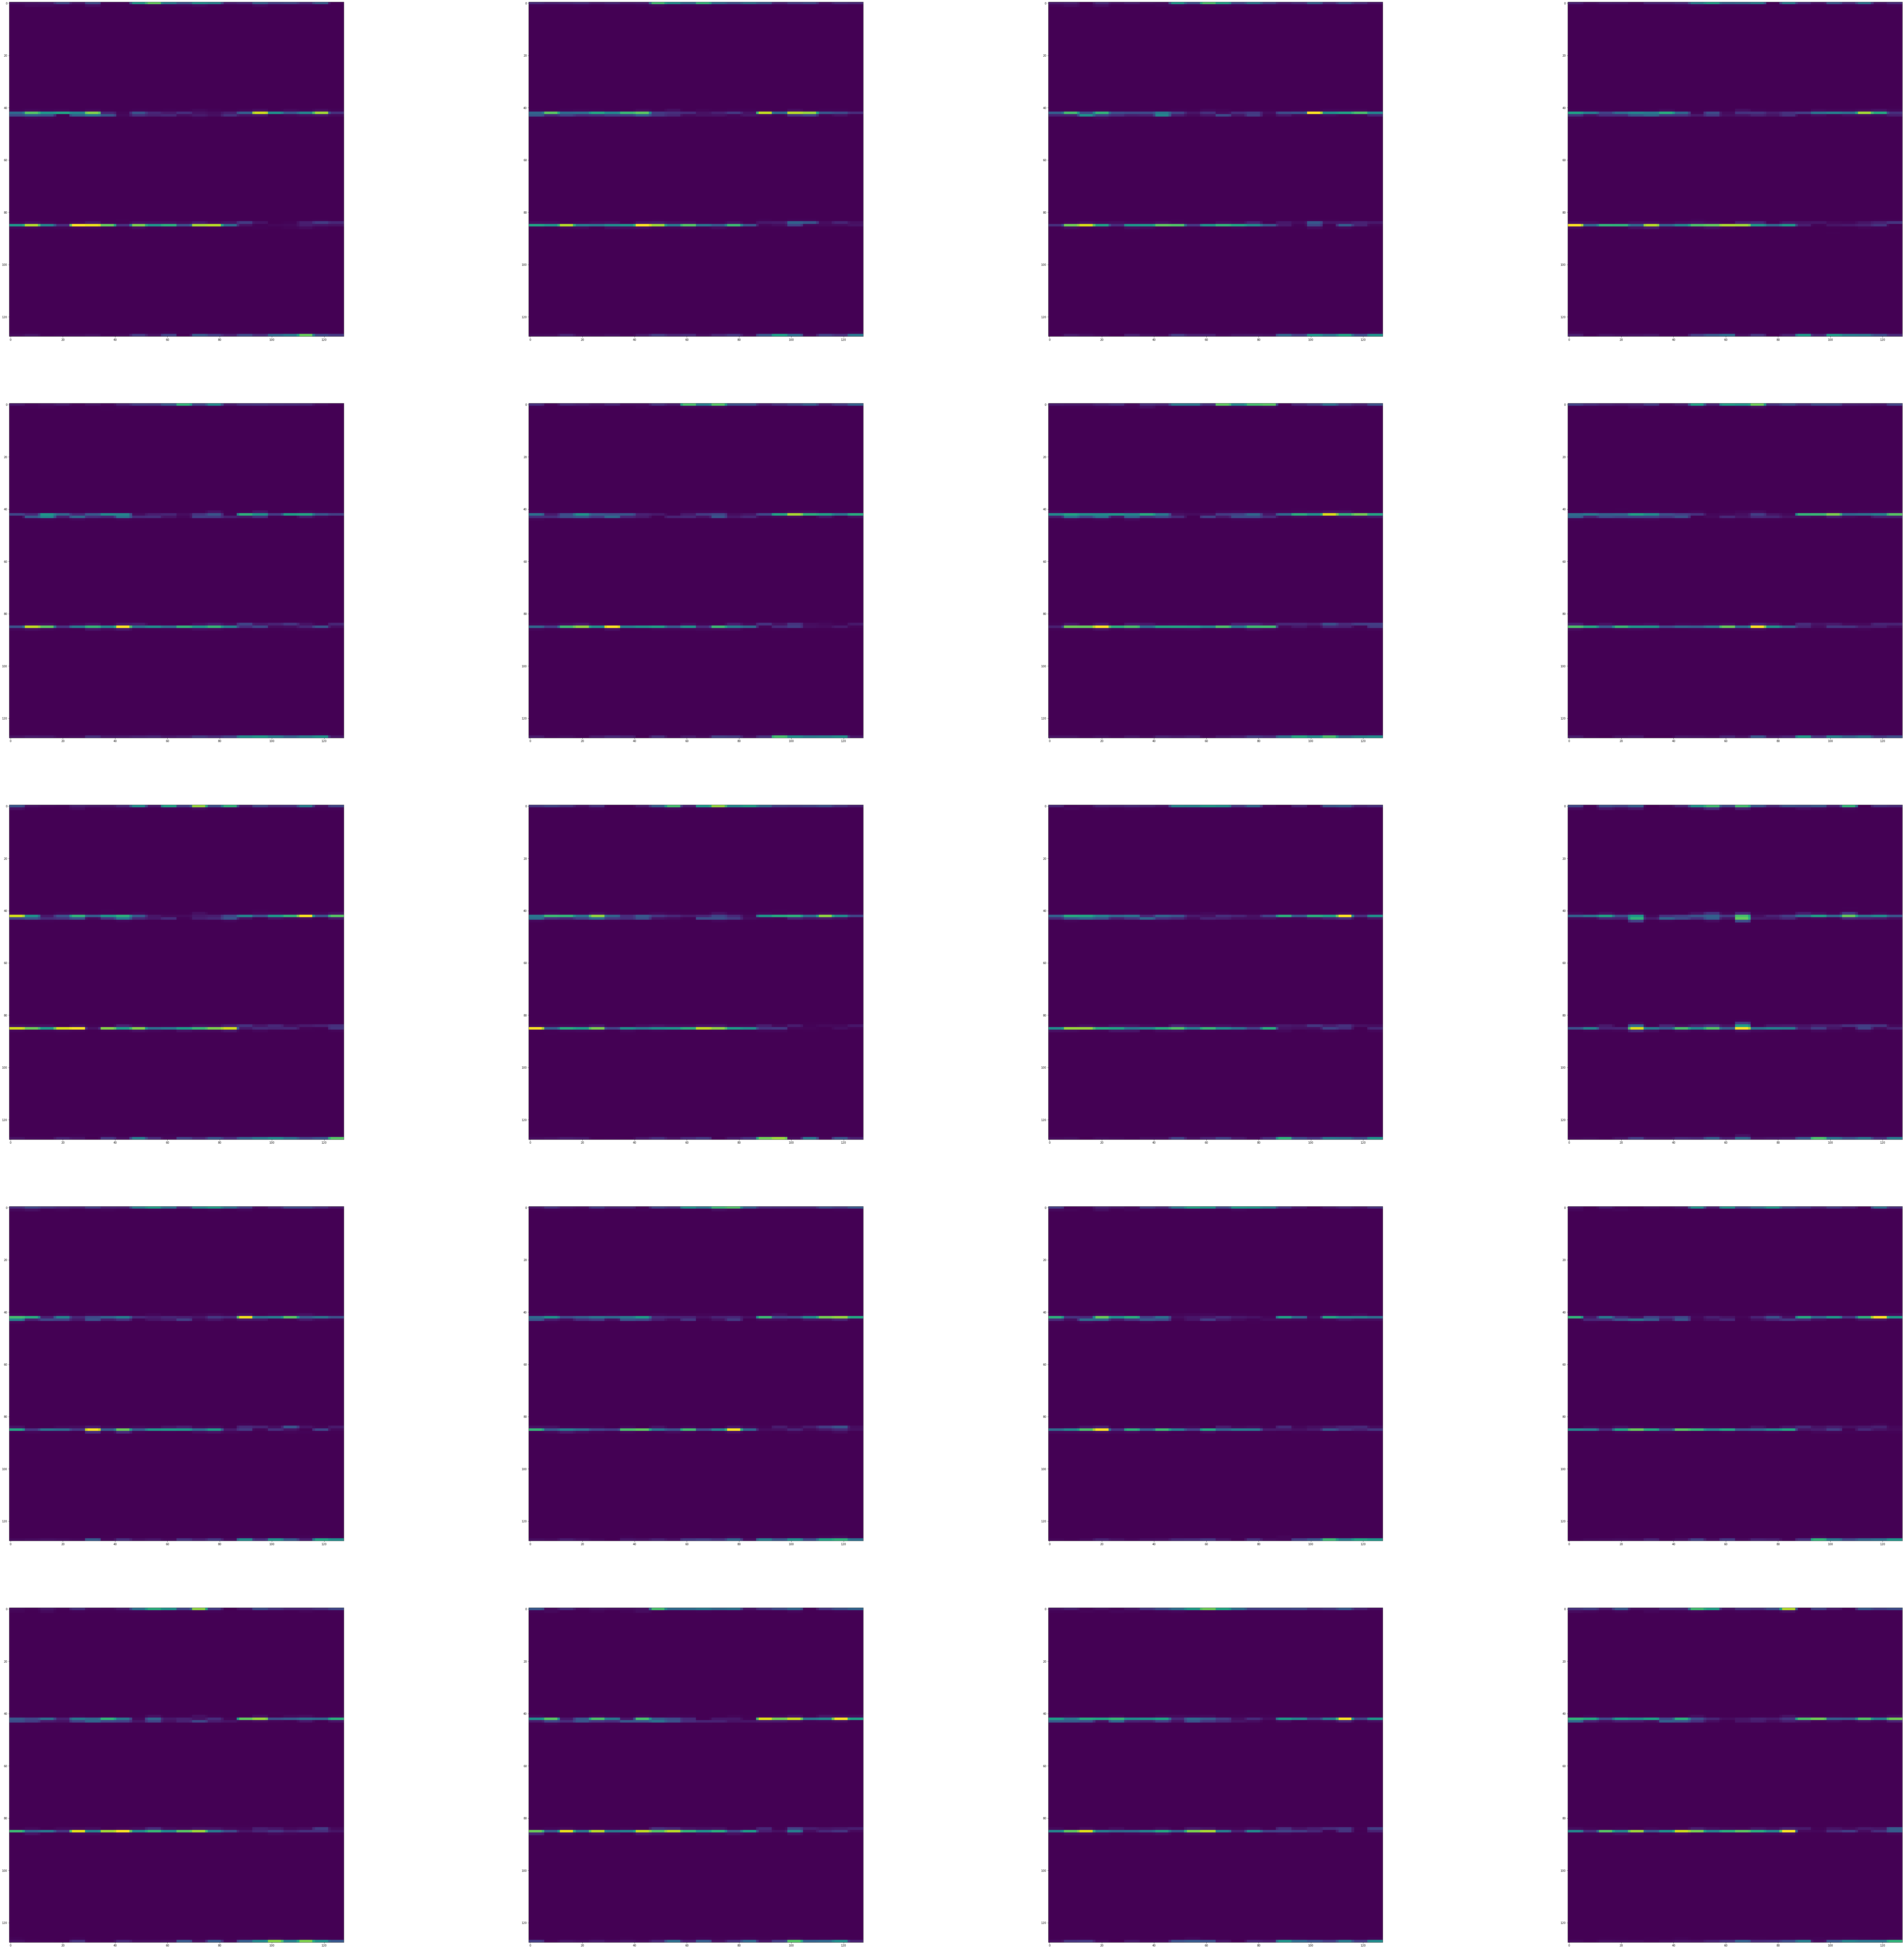

In [ ]:
import matplotlib.pyplot as plt

w=10
h=10
fig=plt.figure(figsize=(128, 128))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = np.random.randint(100)
    fig.add_subplot(rows, columns, i)
    plt.imshow(all_X[i][:,:,0])
plt.show()

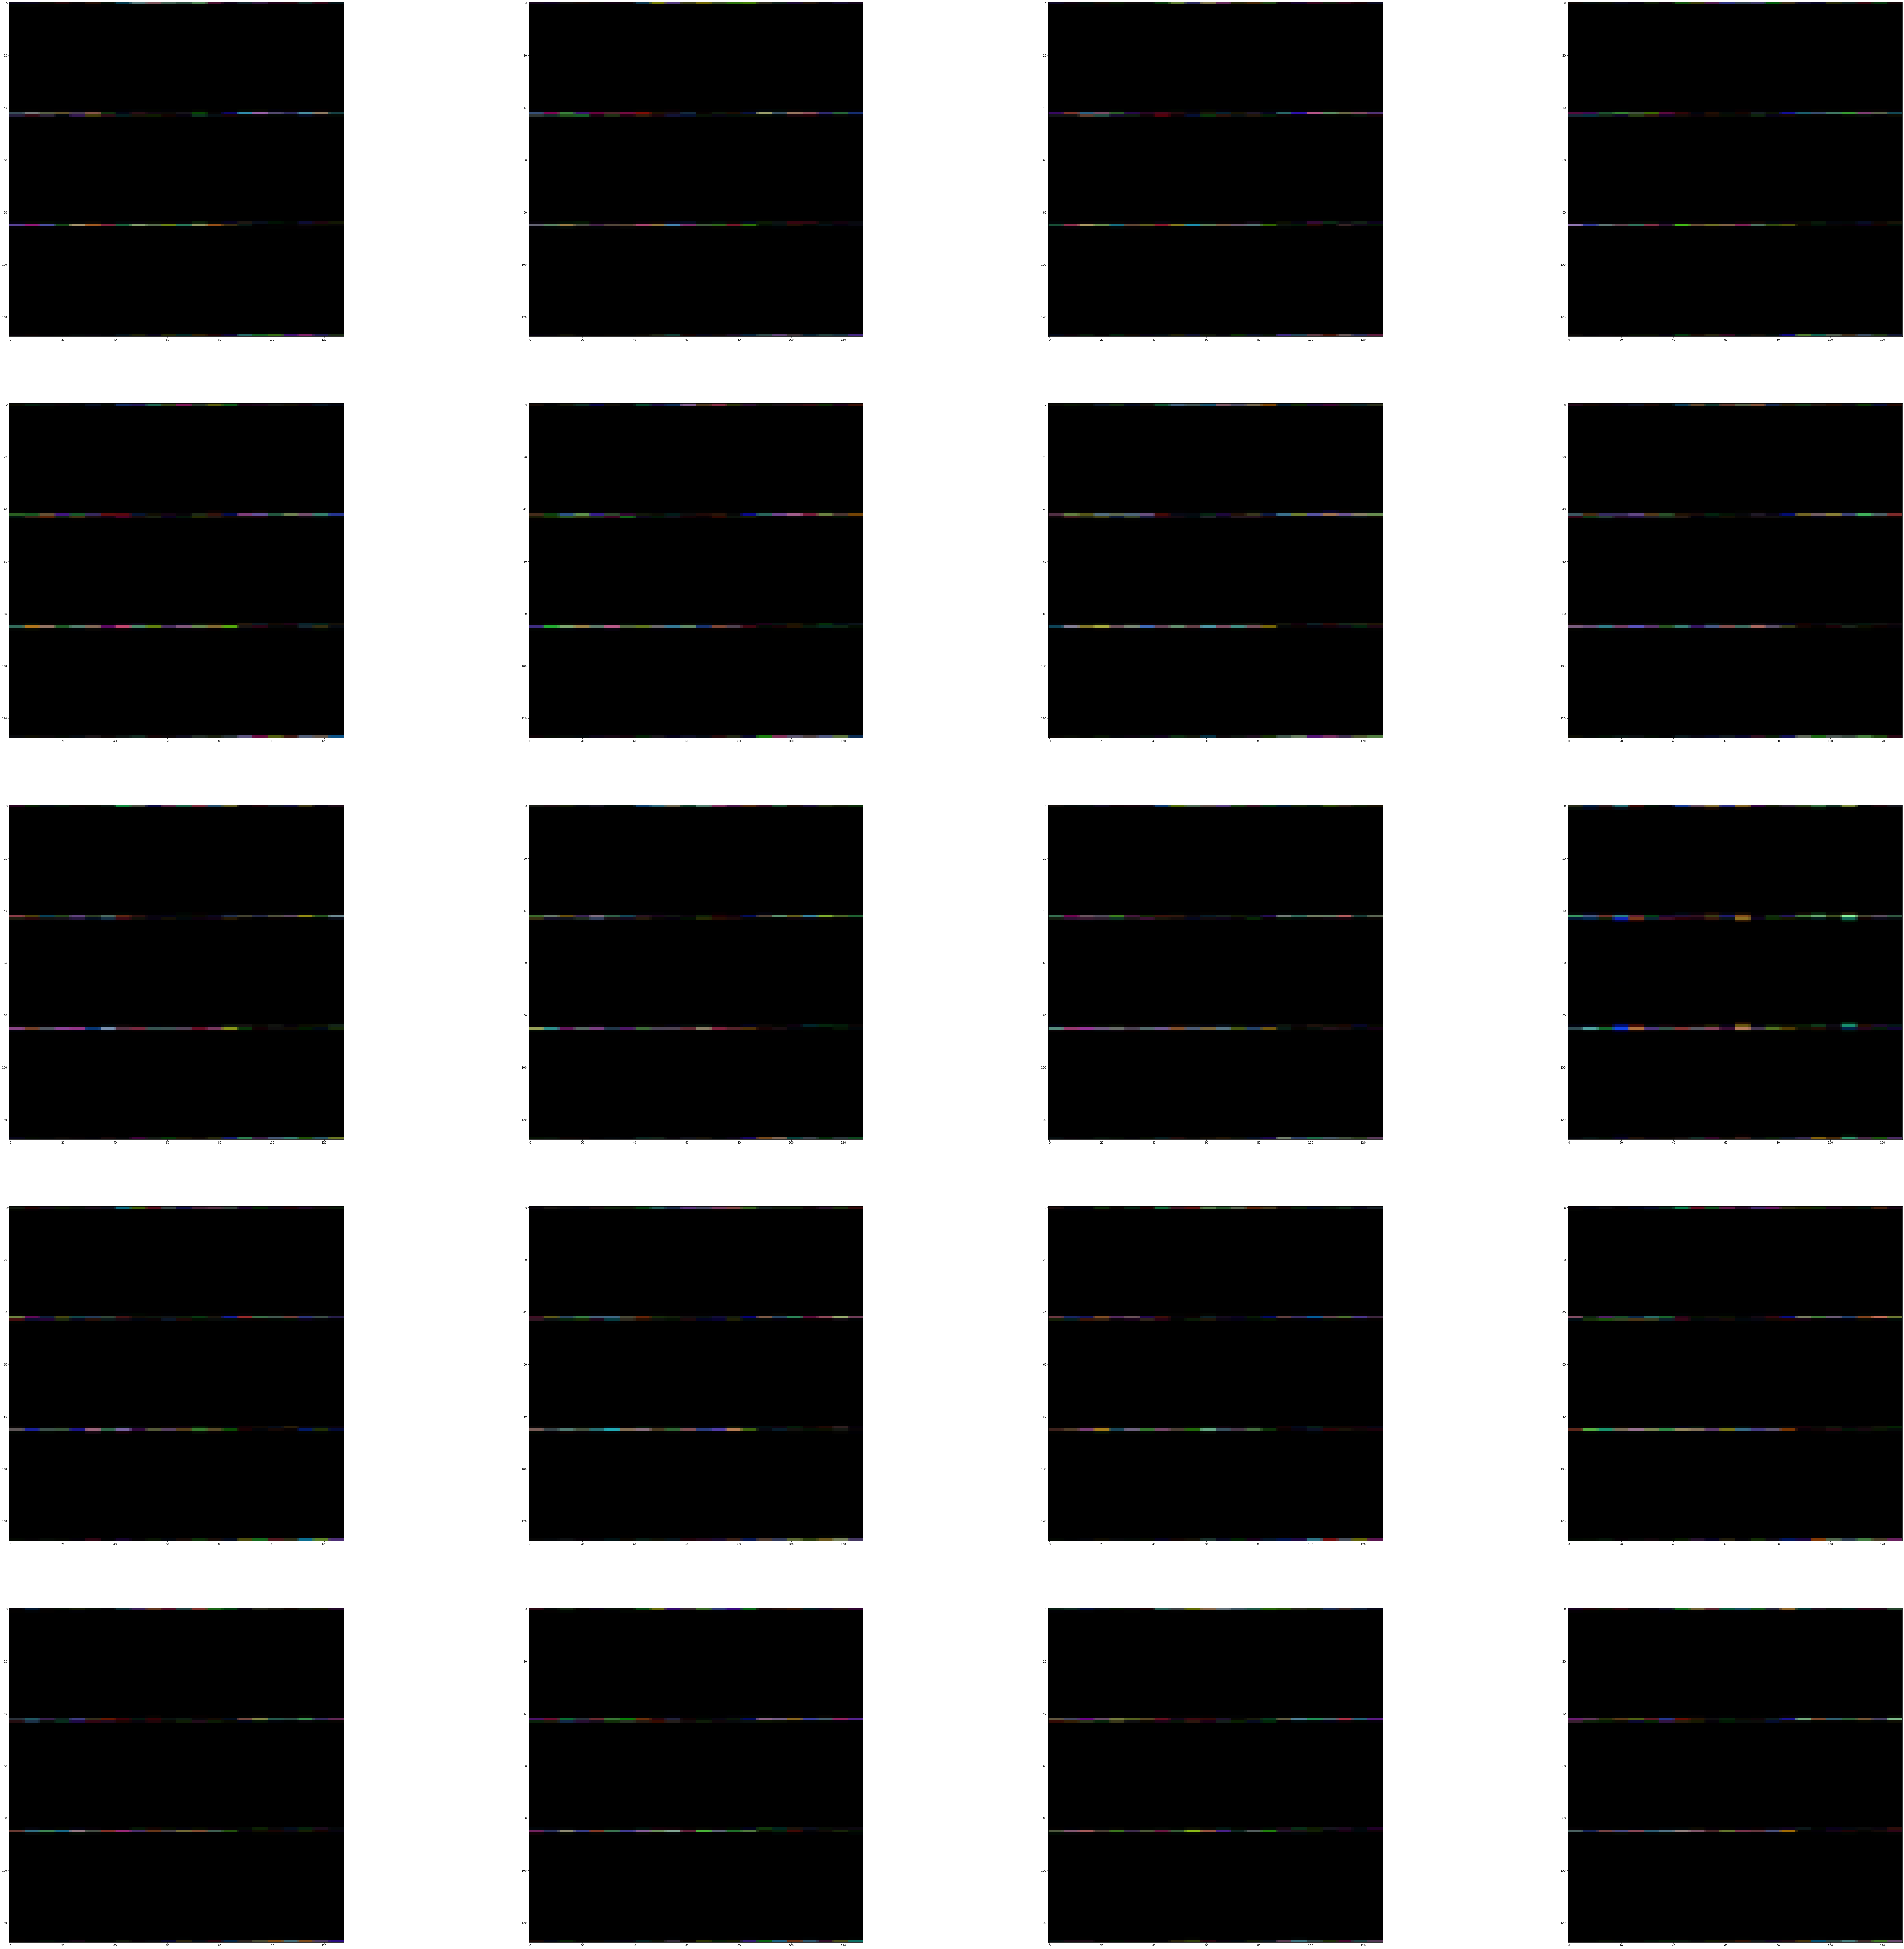

In [ ]:
import matplotlib.pyplot as plt

w=10
h=10
fig=plt.figure(figsize=(128, 128))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = np.random.randint(100)
    fig.add_subplot(rows, columns, i)
    plt.imshow(all_X[i])
plt.show()

In [ ]:
for i in range(0 , int(len(all_X)*0.8)):
    name=f'/content/Patient_1/Patient_1/train/image{i}_label{all_Y[i]}.jpg'
    plt.imsave(name,all_X[i])
    
for j in range(int(len(all_X)*0.8) , int(len(all_X))): 
    name=f'/content/Patient_1/Patient_1/test/image{j}_label{all_Y[j]}.jpg'
    plt.imsave(name,all_X[j])

In [ ]:
import os
directory=os.listdir('/content/Patient_1/Patient_1/train')
directoryt=os.listdir('/content/Patient_1/Patient_1/test')
#2 clases of 18 files per class of 10 min data each
print(len(directory))
print(len(directoryt))

17280
4320


In [ ]:
import cv2
from tqdm.notebook import tqdm
import numpy as np

In [ ]:
# Loading validation and training data
def load_train():
  train_img=[]
  train_label=[]
  val_img=[]
  val_label=[]
  for i in tqdm(range(len(directory))):
    if i>9000 and i<12000:
      final_path=os.path.join('/content/Patient_1/Patient_1/train',directory[i])
      img=cv2.imread(final_path)
      val_img.append(img)
      val_label.append(int(directory[i][-5]))
    elif i>18000 and i<21000:
      final_path=os.path.join('/content/Patient_1/Patient_1/train',directory[i])
      img=cv2.imread(final_path)
      val_img.append(img)
      val_label.append(int(directory[i][-5]))
    else:
      final_path=os.path.join('/content/Patient_1/Patient_1/train',directory[i])
      img=cv2.imread(final_path)
      train_img.append(img)
      train_label.append(int(directory[i][-5]))

  return train_img,train_label,val_img,val_label
  # Label 1 is Interictal data and 0 is preictal data

In [ ]:
train_img,train_label,val_img,val_label=load_train()

  0%|          | 0/17280 [00:00<?, ?it/s]

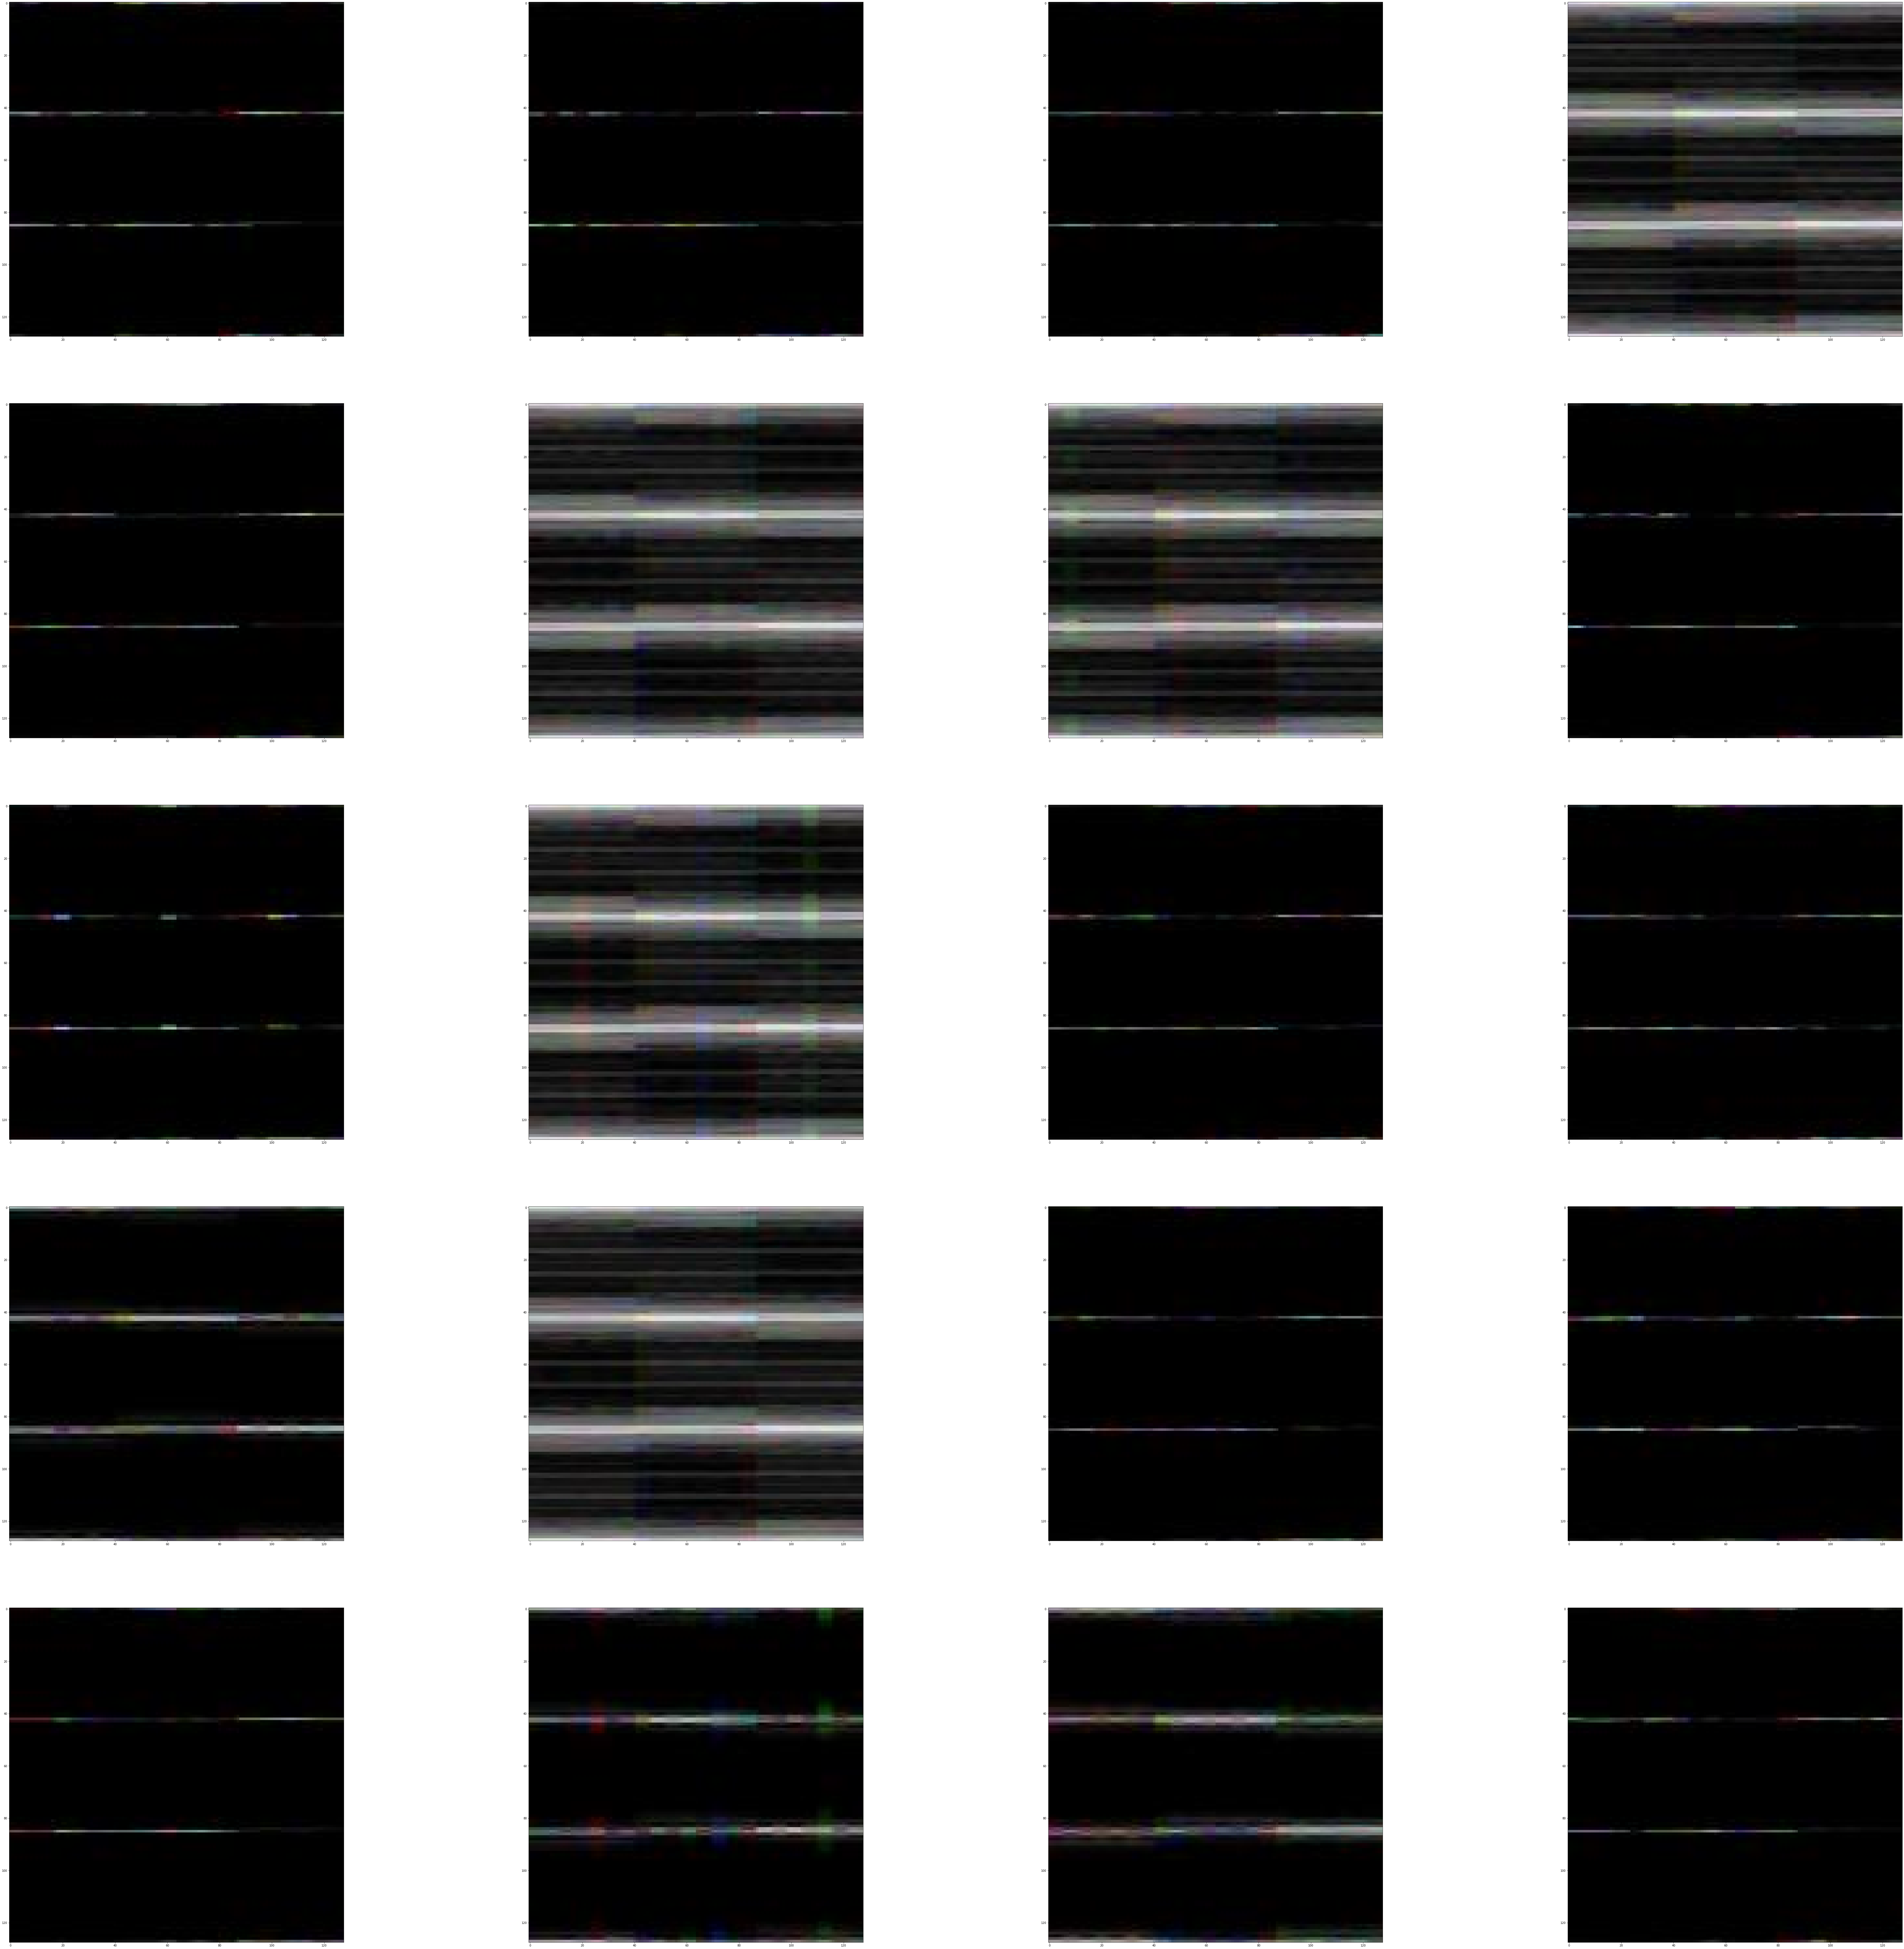

In [ ]:
import matplotlib.pyplot as plt
w=10
h=10
fig=plt.figure(figsize=(128, 128))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = np.random.randint(100)
    fig.add_subplot(rows, columns, i)
    plt.imshow(train_img[i])
plt.show()

In [ ]:
#making numpy arrays
x_train=np.asarray(train_img)
y_train=np.asarray(train_label)
x_val=np.asarray(val_img)
y_val=np.asarray(val_label)

In [ ]:
#freeing up ram
del train_img
del val_img

In [ ]:
from tqdm.notebook import tqdm
import cv2

def load_test():
  test_img=[]
  test_label=[]
  for i in tqdm(range(len(directoryt))):
    final_path=os.path.join('/content/Patient_1/Patient_1/test',directoryt[i])
    img=cv2.imread(final_path)
    test_img.append(img)
    test_label.append(int(directoryt[i][-5]))
  return test_img,test_label

In [ ]:
test_img,test_label=load_test()

  0%|          | 0/4320 [00:00<?, ?it/s]

In [ ]:
import numpy as np
testset=[]
for ele in test_img:
  arr=np.asarray(ele)
  arr=np.expand_dims(arr, axis=0)
  testset.append(arr)

### **EFFICIENTNET**

In [ ]:
!pip install efficientnet

     |████████████████████████████████| 50 kB 2.8 MB/s 


In [ ]:
'''
for i in range(len(all_X)):
    name=f'/content/Patient_1/Patient_1/images_spec/image{i}_label{all_Y[i]}.jpg'
    plt.imsave(name,all_X[i])
'''

"\nfor i in range(len(all_X)):\n    name=f'/content/Patient_1/Patient_1/images_spec/image{i}_label{all_Y[i]}.jpg'\n    plt.imsave(name,all_X[i])\n"

In [ ]:

for i in range(0 , int(len(all_X)*0.8)):
    name=f'/content/Patient_1/Patient_1/train/image{i}_label{all_Y[i]}.jpg'
    plt.imsave(name,all_X[i])
    
for j in range(int(len(all_X)*0.8) , int(len(all_X))): 
    name=f'/content/Patient_1/Patient_1/test/image{j}_label{all_Y[j]}.jpg'
    plt.imsave(name,all_X[j])

# **Trainning **

In [ ]:
import os
directory=os.listdir('/content/Patient_1/Patient_1/train')
directoryt=os.listdir('/content/Patient_1/Patient_1/test')
#2 clases of 18 files per class of 10 min data each
print(len(directory))
print(len(directoryt))

17280
4320


In [ ]:
import cv2
from tqdm.notebook import tqdm
import numpy as np

In [ ]:
# Loading validation and training data
def load_train():
    train_img=[]
    train_label=[]
    val_img=[]
    val_label=[]
    for i in tqdm(range(len(directory))):
        if i>9000 and i<12000:
            final_path=os.path.join('/content/Patient_1/Patient_1/train',directory[i])
            img=cv2.imread(final_path)
            val_img.append(img)
            val_label.append(int(directory[i][-5]))
        elif i>18000 and i<21000:
            final_path=os.path.join('/content/Patient_1/Patient_1/train',directory[i])
            img=cv2.imread(final_path)
            val_img.append(img)
            val_label.append(int(directory[i][-5]))  
        else:
            final_path=os.path.join('/content/Patient_1/Patient_1/train',directory[i])
            img=cv2.imread(final_path)
            train_img.append(img)
            train_label.append(int(directory[i][-5]))

    return train_img,train_label,val_img,val_label
  # Label 1 is Interictal data and 0 is preictal data

In [ ]:
train_img,train_label,val_img,val_label=load_train()

  0%|          | 0/17280 [00:00<?, ?it/s]

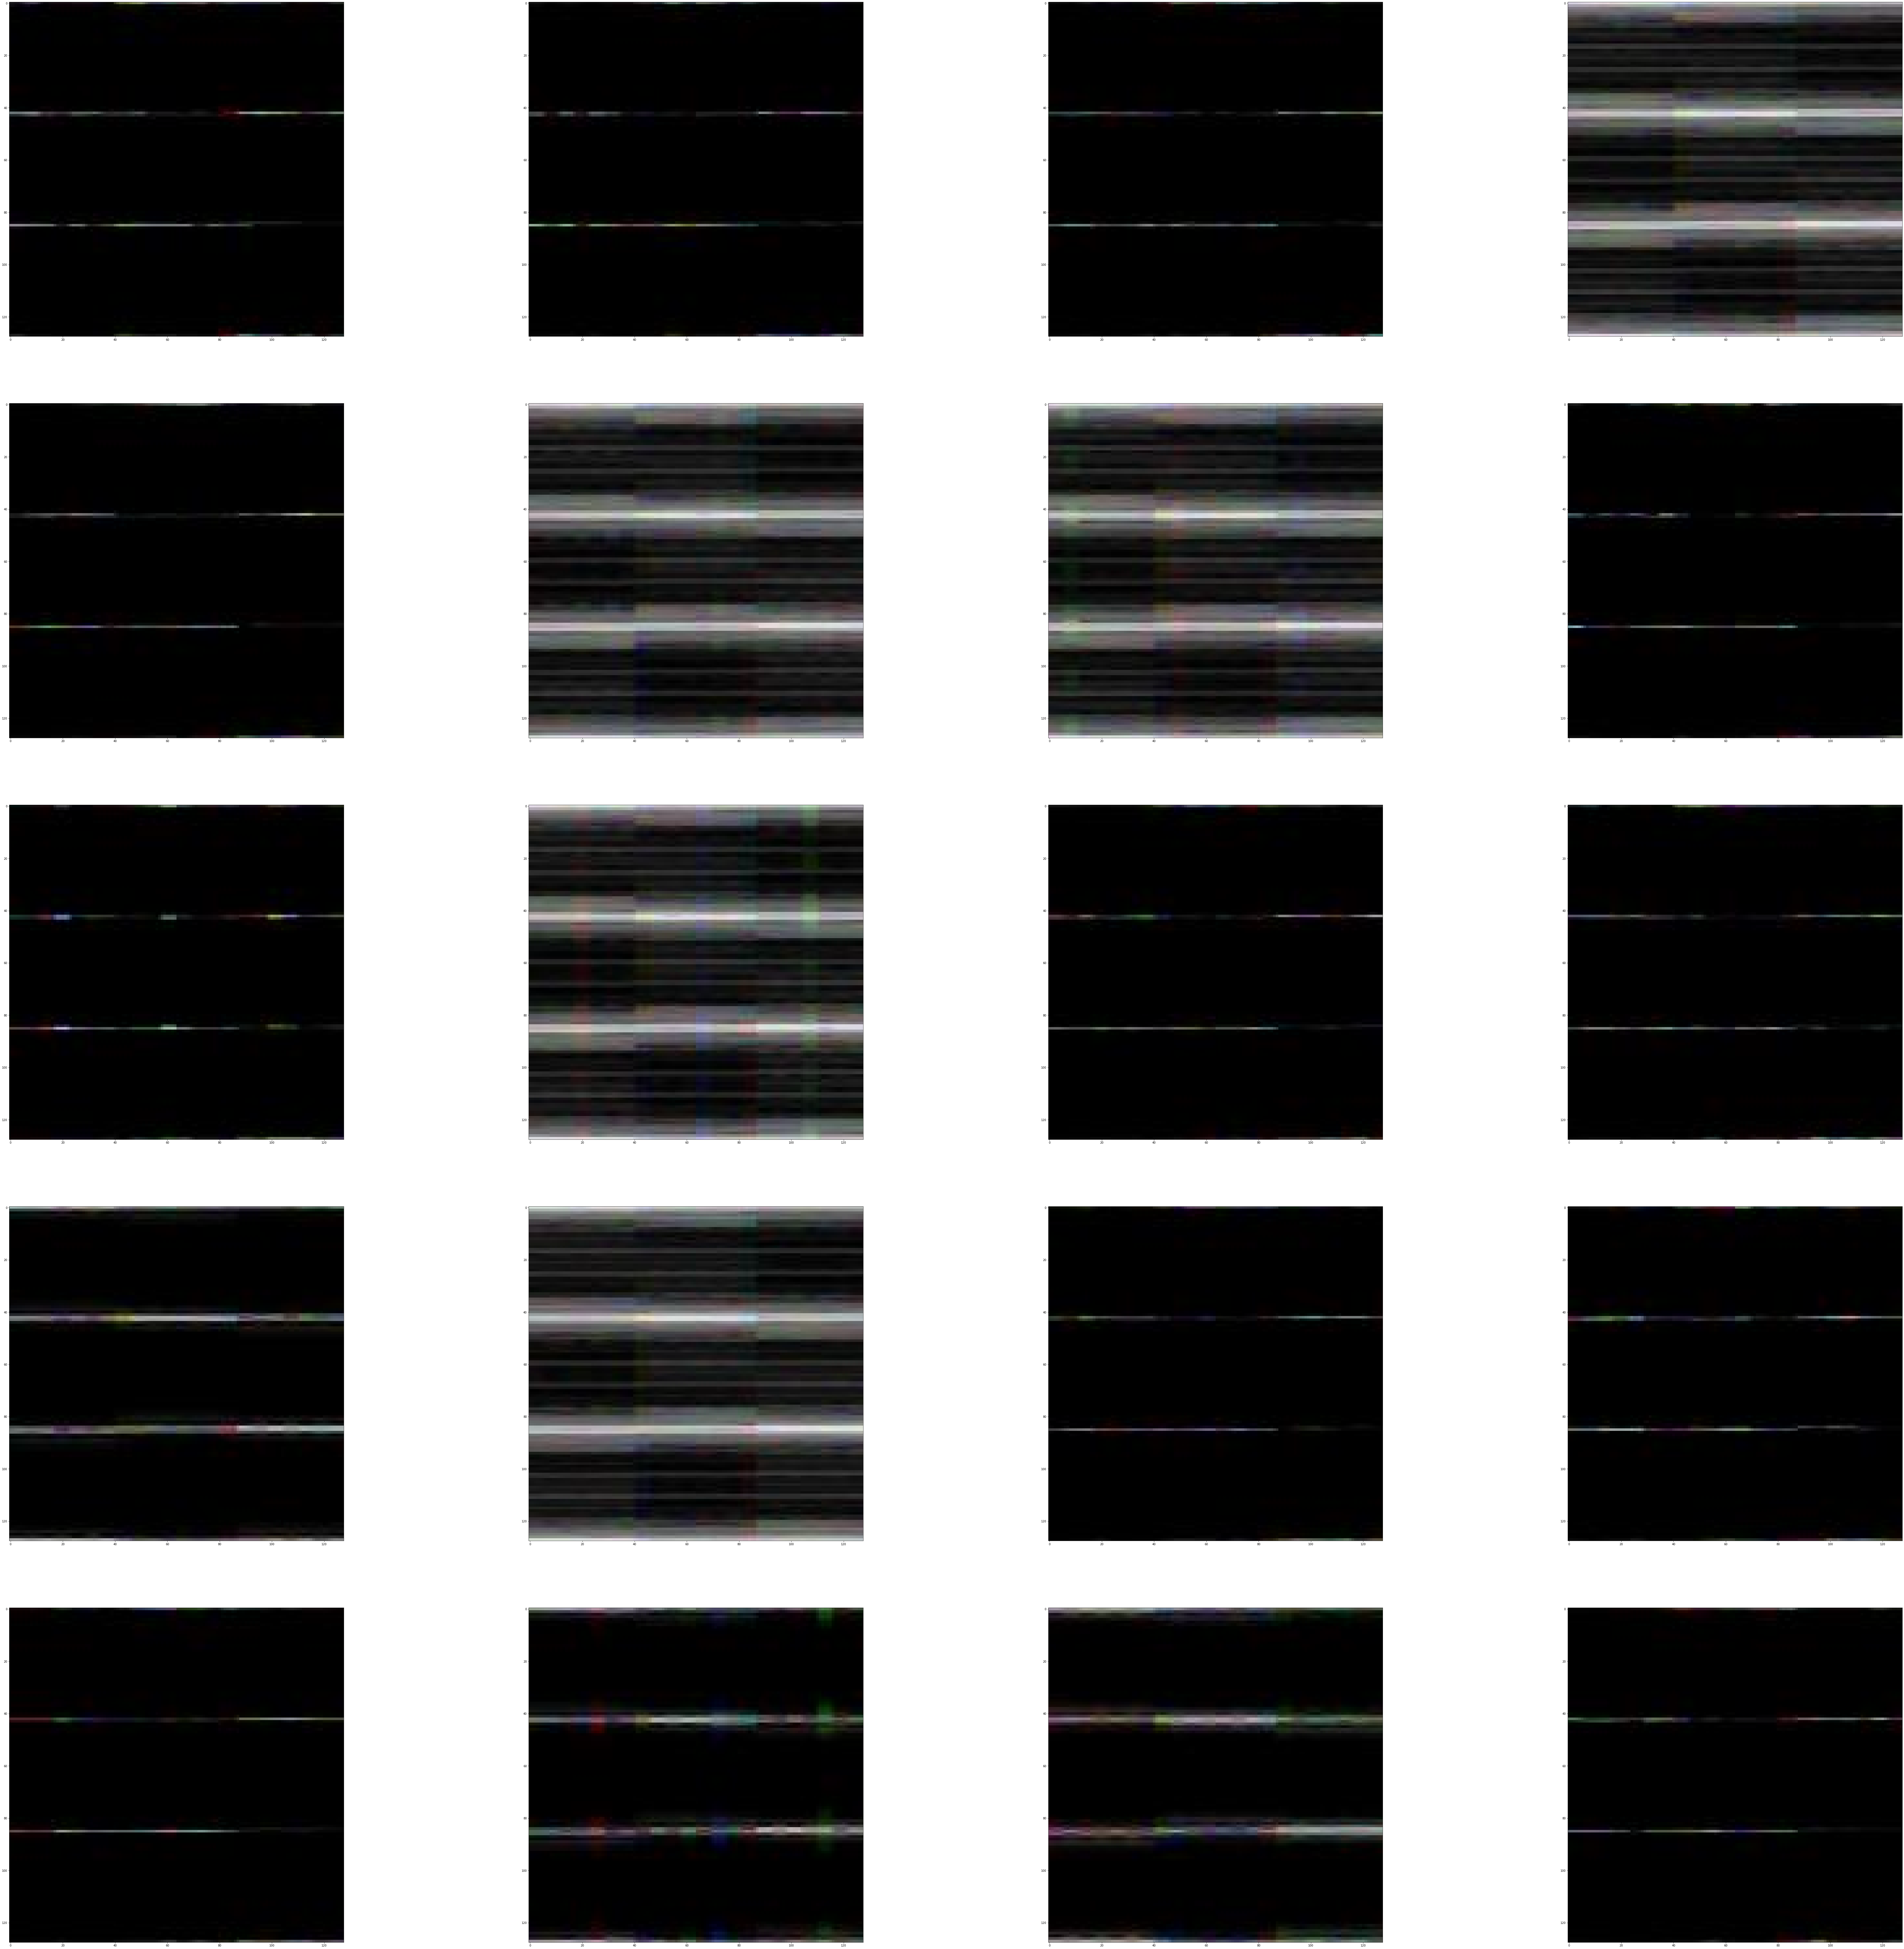

In [ ]:
import matplotlib.pyplot as plt
w=10
h=10
fig=plt.figure(figsize=(128, 128))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = np.random.randint(100)
    fig.add_subplot(rows, columns, i)
    plt.imshow(train_img[i])

plt.show()

In [ ]:
#making numpy arrays
x_train=np.asarray(train_img)
y_train=np.asarray(train_label)
x_val=np.asarray(val_img)
y_val=np.asarray(val_label)

In [ ]:
#freeing up ram
del train_img
del val_img

In [ ]:
from tqdm.notebook import tqdm
import cv2

def load_test():
    test_img=[]
    test_label=[]
    for i in tqdm(range(len(directoryt))):
        final_path=os.path.join('/content/Patient_1/Patient_1/test',directoryt[i])
        img=cv2.imread(final_path)
        test_img.append(img)
        test_label.append(int(directoryt[i][-5]))
    return test_img,test_label

In [ ]:
test_img,test_label=load_test()

  0%|          | 0/4320 [00:00<?, ?it/s]

In [ ]:
import numpy as np
testset=[]
for ele in test_img:
    arr=np.asarray(ele)
    arr=np.expand_dims(arr, axis=0)
    testset.append(arr)

In [ ]:
!pip install efficientnet

     |████████████████████████████████| 50 kB 1.7 MB/s 


In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.metrics import categorical_accuracy, top_k_categorical_accuracy
from tensorflow.keras import layers as L
import efficientnet.tfkeras as efn
from tensorflow.keras.utils import to_categorical

In [ ]:
#EfficientNet
def normalize(image):
    
  # https://github.com/tensorflow/tpu/blob/master/models/official/efficientnet/main.py#L325-L326
  # https://github.com/tensorflow/tpu/blob/master/models/official/efficientnet/efficientnet_builder.py#L31-L32
    image -= tf.constant([0.485 * 255, 0.456 * 255, 0.406 * 255])  # RGB
    image /= tf.constant([0.229 * 255, 0.224 * 255, 0.225 * 255])  # RGB
  #officially given by pytorch.
    return image

def get_model(input_size, backbone='efficientnet-b3', weights='imagenet', tta=False):
    print(f'Using backbone {backbone} and weights {weights}')
    x = L.Input(shape=input_size, name='imgs', dtype='float32')
    y = normalize(x)
    if backbone.startswith('efficientnet'):
        model_fn = getattr(efn, f'EfficientNetB{backbone[-1]}')

    y = model_fn(input_shape=input_size, weights=weights, include_top=False)(y)
    y = L.GlobalAveragePooling2D()(y)
    y = L.Dropout(0.2)(y)

    y = L.Dense(2, activation='softmax')(y)
    model = tf.keras.Model(x, y)
    return model


model = get_model(input_size= (128,128,3))

Using backbone efficientnet-b3 and weights imagenet


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator()

In [ ]:
model.compile(optimizer=Adam(lr=0.001),
                loss=categorical_crossentropy,
                metrics=[categorical_accuracy])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
reduce_learning_rate = ReduceLROnPlateau(monitor='val_loss',
                                         factor=0.1,
                                         patience=4,
                                         cooldown=2,
                                         min_lr=0.00001,
                                         verbose=1)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator()

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),loss=categorical_crossentropy,metrics=[categorical_accuracy])

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
reduce_learning_rate = ReduceLROnPlateau(monitor='val_loss',
                                         factor=0.1,
                                         patience=4,
                                         cooldown=2,
                                         min_lr=0.00001,
                                         verbose=1)

In [ ]:
history=model.fit(datagen.flow(x_train, to_categorical(y_train,2), batch_size=64),steps_per_epoch=100,validation_data=datagen.flow(x_val, to_categorical(y_val,2), batch_size=64), epochs=25, callbacks=[reduce_learning_rate])

Epoch 1/25
100/100 [==============================] - 972s 10s/step - loss: 0.3907 - categorical_accuracy: 0.8101 - val_loss: 0.6217 - val_categorical_accuracy: 0.8153
Epoch 2/25
100/100 [==============================] - 950s 10s/step - loss: 0.3397 - categorical_accuracy: 0.8473 - val_loss: 0.7350 - val_categorical_accuracy: 0.6552
Epoch 3/25
100/100 [==============================] - 941s 9s/step - loss: 0.3314 - categorical_accuracy: 0.8453 - val_loss: 0.4674 - val_categorical_accuracy: 0.7446
Epoch 4/25
100/100 [==============================] - 937s 9s/step - loss: 0.3081 - categorical_accuracy: 0.8637 - val_loss: 0.3254 - val_categorical_accuracy: 0.8436
Epoch 5/25
100/100 [==============================] - 931s 9s/step - loss: 0.3313 - categorical_accuracy: 0.8563 - val_loss: 275.7260 - val_categorical_accuracy: 0.6249
Epoch 6/25
100/100 [==============================] - 937s 9s/step - loss: 0.3281 - categorical_accuracy: 0.8552 - val_loss: 0.4116 - val_categorical_accuracy: 0

KeyboardInterrupt: ignored

In [ ]:
model.save('/content/drive/MyDrive/NNN.h5')

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/NNN.h5')

In [ ]:
score = model.evaluate(x_val, to_categorical(y_val,2))
print('Test loss:', score[0])
print('Test accuracy:', score[1])

94/94 [==============================] - 96s 992ms/step - loss: 0.2313 - categorical_accuracy: 0.9013
Test loss: 0.2312992811203003
Test accuracy: 0.9013004302978516


### **TEST**

In [ ]:
from scipy.io import loadmat
Fil_pathe ='/content/drive/MyDrive/data/Patient_1/Patient_1/Patient_1_interictal_segment_0038.mat'
data = scipy.io.loadmat(Fil_pathe)


In [ ]:
print(data)

In [ ]:
data['interictal_segment_38'][0][0][0]

In [ ]:
all_X = []
d_array = data['interictal_segment_38'][0][0][0]
lst = list(range(3000000))  # 10 minutes   5000*600
for m in lst[::5000]:
  arr=[]
  # Create a spectrogram every 1 second
  p_secs = d_array[0][m:m+5000]
  p_f, p_t, p_Sxx = spectrogram(p_secs, fs=5000, return_onesided=False)
  p_SS = np.log1p(p_Sxx)
  arr1 = p_SS[:] / np.max(p_SS)
  arr.append(arr1)
  p_secs = d_array[1][m:m+5000]
  p_f, p_t, p_Sxx = spectrogram(p_secs, fs=5000, return_onesided=False)
  p_SS = np.log1p(p_Sxx)          #P_SS spectogram
  arr2 = p_SS[:] / np.max(p_SS)   #normalize
  arr.append(arr2)
  p_secs = d_array[2][m:m+5000]
  p_f, p_t, p_Sxx = spectrogram(p_secs, fs=5000, return_onesided=False)
  p_SS = np.log1p(p_Sxx)
  arr3 = p_SS[:] / np.max(p_SS)
  arr.append(arr3)
  arr=np.reshape(arr,(256,22,3))
  resized = cv2.resize(src=arr, dsize=(128,128), interpolation = cv2.INTER_AREA)
  all_X.append(resized)


SystemError: ignored

In [ ]:
for j in range(1, int(len(all_X))): 
  test = 

AxesImage(54,36;334.8x217.44)


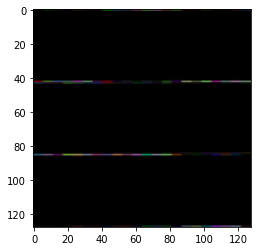

In [ ]:
test = plt.imshow(all_X[0])
print(test)

In [ ]:
for j in range(1, int(len(all_X))): 
    name=f'/content/drive/MyDrive/data/deploy/image{j}.jpg'
    test = plt.imsave(name,all_X[j])


img=img=cv2.imread('/content/drive/MyDrive/data/deploy/image100.jpg')
#img=normalize(img) 

In [ ]:
plt.imshow(all_X[101])
plt.show()

In [ ]:
test = plt.imshow(img)
print(img.shape)

In [ ]:
 rr  =np.asarray(test)

In [ ]:
mon_image = np.asarray(img)
import numpy as np
testset=[]

arr=np.asarray(img)
arr=np.expand_dims(arr, axis=0)
testset.append(arr)


In [ ]:
from efficientnet.tfkeras import EfficientNetB4
model = tf.keras.models.load_model('/content/drive/MyDrive/NNN.h5')

In [ ]:
tf.saved_model.save(model,export_dir='/content/drive/MyDrive/save_model',signatures=None)

In [ ]:
pred = model.predict(testset)